# Проект по SQL

# Цель исследования:

Проанализировать базу данных.

В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг.\
Эти данные помогут сформулировать ценностное предложение для нового продукта.

# Задания

- Посчитать, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитать количество обзоров и среднюю оценку;
- Определить издательство, которое выпустило наибольшее число книг толще 50 страниц — так мы исключим из анализа брошюры;
- Определить автора с самой высокой средней оценкой книг — учитываем только книги с 50 и более оценками;
- Посчитать среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

# Описание данных

**Таблица `books` - Содержит данные о книгах:**

- book_id — идентификатор книги;
- author_id — идентификатор автора;
- title — название книги;
- num_pages — количество страниц;
- publication_date — дата публикации книги;
- publisher_id — идентификатор издателя.


**Таблица `authors` - Содержит данные об авторах:**

- author_id — идентификатор автора;
- author — имя автора.


**Таблица `publishers` - Содержит данные об издательствах:**

- publisher_id — идентификатор издательства;
- publisher — название издательства;


**Таблица `ratings` - Содержит данные о пользовательских оценках книг:**

- rating_id — идентификатор оценки;
- book_id — идентификатор книги;
- username — имя пользователя, оставившего оценку;
- rating — оценка книги.


**Таблица `reviews` - Содержит данные о пользовательских обзорах:**

- review_id — идентификатор обзора;
- book_id — идентификатор книги;
- username — имя автора обзора;
- text — текст обзора.

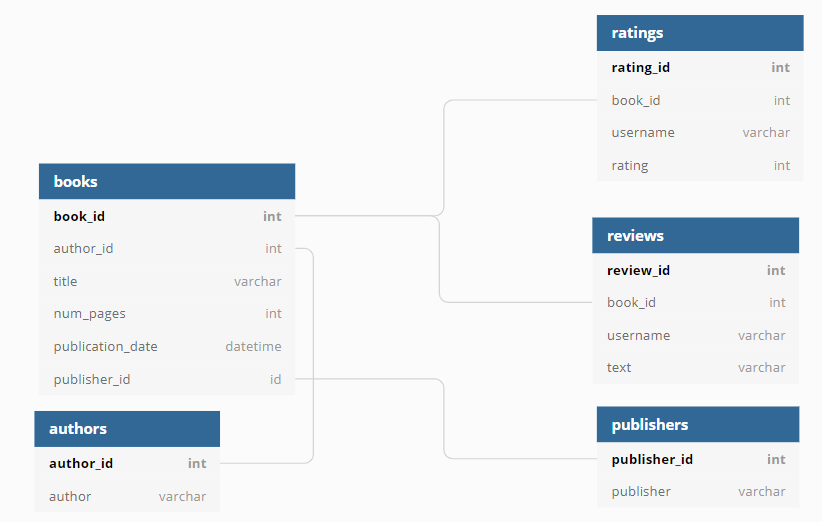

## Шаг 1. Импортируем библиотеки, загружаем необходимые нам данные в переменные.

In [27]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import text, create_engine
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})
# чтобы выполнить SQL-запрос, используем Pandas
query = '''SELECT * FROM books LIMIT 1'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93


### Информация о датафрейме books.

In [4]:
# выводим первые 5 строк датафрейма
query = '''SELECT * FROM books'''
books = pd.io.sql.read_sql(sql=text(query), con = con)
books.head()

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [5]:
books.info() # информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [6]:
print('Количество столбцов в датафрейме:', books.columns.shape[0])
print()
print('Количество строк в датафрейме:', len(books))
print()
print('Количество явных дубликатов в датафрейме:', books.duplicated().sum())
print()
print('Количество пропусков в датафрейме:', books.isna().sum())

Количество столбцов в датафрейме: 6

Количество строк в датафрейме: 1000

Количество явных дубликатов в датафрейме: 0

Количество пропусков в датафрейме: book_id             0
author_id           0
title               0
num_pages           0
publication_date    0
publisher_id        0
dtype: int64


### Информация о датафрейме authors.

In [7]:
# выводим первые 5 строк датафрейма
query = '''SELECT * FROM authors LIMIT 5'''
authors = pd.io.sql.read_sql(sql=text(query), con = con)
authors.head()

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [8]:
authors.info() # информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  5 non-null      int64 
 1   author     5 non-null      object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [9]:
print('Количество столбцов в датафрейме:', authors.columns.shape[0])
print()
print('Количество строк в датафрейме:', len(authors))
print()
print('Количество явных дубликатов в датафрейме:', authors.duplicated().sum())
print()
print('Количество пропусков в датафрейме:', authors.isna().sum())

Количество столбцов в датафрейме: 2

Количество строк в датафрейме: 5

Количество явных дубликатов в датафрейме: 0

Количество пропусков в датафрейме: author_id    0
author       0
dtype: int64


### Информация о датафрейме publishers.

In [10]:
# выводим первые 5 строк датафрейма
query = '''SELECT * FROM publishers'''
publishers = pd.io.sql.read_sql(sql=text(query), con = con)
publishers.head()

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [11]:
publishers.info() # информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


In [12]:
print('Количество столбцов в датафрейме:', publishers.columns.shape[0])
print()
print('Количество строк в датафрейме:', len(publishers))
print()
print('Количество явных дубликатов в датафрейме:', publishers.duplicated().sum())
print()
print('Количество пропусков в датафрейме:', publishers.isna().sum())

Количество столбцов в датафрейме: 2

Количество строк в датафрейме: 340

Количество явных дубликатов в датафрейме: 0

Количество пропусков в датафрейме: publisher_id    0
publisher       0
dtype: int64


### Информация о датафрейме ratings.

In [13]:
# выводим первые 5 строк датафрейма
query = '''SELECT * FROM ratings'''
ratings = pd.io.sql.read_sql(sql=text(query), con = con)
ratings.head()

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [14]:
ratings.info() # информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB


In [15]:
print('Количество столбцов в датафрейме:', ratings.columns.shape[0])
print()
print('Количество строк в датафрейме:', len(ratings))
print()
print('Количество явных дубликатов в датафрейме:', ratings.duplicated().sum())
print()
print('Количество пропусков в датафрейме:', ratings.isna().sum())

Количество столбцов в датафрейме: 4

Количество строк в датафрейме: 6456

Количество явных дубликатов в датафрейме: 0

Количество пропусков в датафрейме: rating_id    0
book_id      0
username     0
rating       0
dtype: int64


### Информация о датафрейме reviews.

In [16]:
# выводим первые 5 строк датафрейма
query = '''SELECT * FROM reviews'''
reviews = pd.io.sql.read_sql(sql=text(query), con = con)
reviews.head()

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [17]:
reviews.info() # информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB


In [18]:
print('Количество столбцов в датафрейме:', reviews.columns.shape[0])
print()
print('Количество строк в датафрейме:', len(reviews))
print()
print('Количество явных дубликатов в датафрейме:', reviews.duplicated().sum())
print()
print('Количество пропусков в датафрейме:', reviews.isna().sum())

Количество столбцов в датафрейме: 4

Количество строк в датафрейме: 2793

Количество явных дубликатов в датафрейме: 0

Количество пропусков в датафрейме: review_id    0
book_id      0
username     0
text         0
dtype: int64


### **Краткие выводы по Шагу 1:**

1. Мы загрузили необходимые библиотеки и загрузили все необходимые для анализа данные.
2. Всего у нас 5 датафреймов.
3. Пропусков и явных дубликатов в датафреймах нет.

## Шаг 2. Задания.

### Задание №1. Посчитать, сколько книг вышло после 1 января 2000 года;

In [19]:
query = '''Select count(books) as cnt_books
           From books 
           Where publication_date > '2000-01-01' '''
q1 = pd.io.sql.read_sql(sql=text(query), con = con)
q1

,cnt_books
0,819


* **Краткий вывод:**


- После 1 января 2000 года вышло 819 книг.

### Задание №2. Для каждой книги посчитать количество обзоров и среднюю оценку;

Таблица `reviews` - Содержит данные о пользовательских обзорах.\
Таблица `ratings` - Содержит данные о пользовательских оценках книг.\
Таблица `books` - Содержит данные о книгах.

In [20]:
query = '''
with t1 as
(Select book_id, count(review_id) as cnt_reviews
 From reviews
 Group by book_id),
 
t2 as
(Select book_id, AVG(rating) as avg_rating
 From ratings
 Group by book_id)


Select b.title as book_name,
       t1.cnt_reviews,
       t2.avg_rating
From books b 
    left join t1 on b.book_id = t1.book_id
    left join t2 on b.book_id = t2.book_id
           '''
q2 = pd.io.sql.read_sql(sql=text(query), con = con)
q2

,book_name,cnt_reviews,avg_rating
0,The Body in the Library (Miss Marple #3),2.0,4.500000
1,Galápagos,2.0,4.500000
2,A Tree Grows in Brooklyn,5.0,4.250000
3,Undaunted Courage: The Pioneering First Missio...,2.0,4.000000
4,The Prophet,4.0,4.285714
...,...,...,...
995,The Cat in the Hat and Other Dr. Seuss Favorites,NaN,5.000000
996,Anne Rice's The Vampire Lestat: A Graphic Novel,NaN,3.666667
997,Essential Tales and Poems,NaN,4.000000
998,Leonardo's Notebooks,NaN,4.000000


In [21]:
q2['cnt_reviews'].isna().sum() # количество книг без обзоров

6

In [22]:
q2['cnt_reviews'].value_counts() # распределние количества обзоров

2.0    444
3.0    277
4.0    160
5.0     60
1.0     37
6.0     15
7.0      1
Name: cnt_reviews, dtype: int64

In [28]:
q2['avg_rating'].median() # медианное значение обзоров

4.0

* **Краткие вывод:**


- Для каждой из книг (всего 1000) вывели количество обзоров и средний рейтинг.
- Как видим, у некоторых книг нет обзоров вовсе. (всего таких 6)
- Больше всего книг с количеством обзоров равным 2. (444 книг)
- Наибольшее количество обзоров только у одной из книг (7 обзоров).
- Медианый рейтинг всех рассматриваемых книг равен 4.

### Задание №3. Определить издательство, которое выпустило наибольшее число книг толще 50 страниц — так мы исключим из анализа брошюры;

Таблица `publishers` - Содержит данные об издательствах.\
Таблица `books` - Содержит данные о книгах.

In [24]:
query = '''
Select publisher, count(book_id) as books
From publishers p left join books b on p.publisher_id = b.publisher_id
Where num_pages > 50
Group by publisher
Order by count(book_id) desc
Limit 1
           '''
q3 = pd.io.sql.read_sql(sql=text(query), con = con)
q3

,publisher,books
0,Penguin Books,42


* **Краткие вывод:**


- Наибольшее количество книг толще 50 страниц выпустило издательство `Penguin Books` - 42 книги
- На втором месте находится издательство `Vintage` - 31 книга
- На третьем месте находится издательство `Grand Central Publishing` - 25 книг.

### Задание №4. Определить автора с самой высокой средней оценкой книг — учитываем только книги с 50 и более оценками;

Таблица `ratings` - Содержит данные о пользовательских оценках книг.\
Таблица `authors` - Содержит данные об авторах.\
Таблица `books` - Содержит данные о книгах.

In [25]:
query = '''
with t1 as
(Select b.book_id, count(rating), author_id
 From books b left join ratings r on b.book_id = r.book_id
 Group by b.book_id
 Having count(rating) >= 50
 Order by count(rating) desc)
 
 Select author, avg(rating) as avg_rating
 From authors a inner join t1 on a.author_id=t1.author_id
                inner join ratings r on t1.book_id=r.book_id
 Group by author
 Order by avg(rating) desc
 Limit 1
           '''
q4 = pd.io.sql.read_sql(sql=text(query), con = con)
q4

,author,avg_rating
0,J.K. Rowling/Mary GrandPré,4.287097


* **Краткие вывод:**


- При учёте только книг с 50 и более оценками наибольший средний рейтинг книг у автора - `J.K. Rowling/Mary GrandPré` (4.287097)
- На втором месте - `Markus Zusak/Cao Xuân Việt Khương`
- Почетное третье место занимает - `J.R.R. Tolkien`
- Всего у нас имеется 19 книг, у которых 50 и более оценок.

- При необходимости округления данного рейтинга - можно воспользоваться функцией `round()`
- Для того чтобы увидеть всех писателей - необходимо убрать из SQL-запроса последнюю строчку - `Limit 1`.

### Задание №5. Посчитать среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

Таблица `reviews` - Содержит данные о пользовательских обзорах.\
Таблица `ratings` - Содержит данные о пользовательских оценках книг.\
Таблица `books` - Содержит данные о книгах.

In [26]:
query = '''
with t1 as
(Select username, count(rating)
 From ratings
 Group by username
 Having count(rating) > 48),
 
t2 as
(Select t1.username, count(review_id) as cnt_review
 From t1 left join reviews r on t1.username = r.username
 Group by t1.username)
 
 Select avg(cnt_review)
 From t2
           '''
q5 = pd.io.sql.read_sql(sql=text(query), con = con)
q5

,avg
0,24.0


* **Краткие вывод:**


- Среднее количество обзоров от пользователей, которые поставили больше 48 оценок равно - `24`.
- Для того чтобы увидеть количество обзоров от каждого пользователя - надо убрать вторую оконную таблицу - и просто прописать:\
Select * From t1

## Общие выводы:

1. Насколько я могу судить, задачи по SQL были не очень сложными) по крайней мере на сайте SQL-ex я решал задачи в разы сложнее)
2. Думаю, если я верно понял сами задания - то и решения должны быть верны.
3. При решении 2,4,5 задач я пользовался оконными функциями.\
Пусть названия t1, t2 - не пугают - так я сокращаю для себя названия table-1, table-2 и т.д.
4. Знаю, что в SQL предпочитают всё писать заглавными буквами, но мне нравится тот стиль, которым пишу я)\
(первая буква заглавная, остальные все строчные). Надеюсь, это не принциаиально)


**Ответы на задания следующие:**


- После 1 января 2000 года вышло 819 книг.


- Для каждой из книг (всего 1000) вывели количество обзоров и средний рейтинг. (в таблице во втором задании).


- Наибольшее количество книг толще 50 страниц выпустило издательство `Penguin Books` - 42 книги


- При учёте только книг с 50 и более оценками наибольший средний рейтинг книг у автора - `J.K. Rowling/Mary GrandPré` (4.287097)


- Среднее количество обзоров от пользователей, которые поставили больше 48 оценок равно - `24`.

С Уважением

Степанян Ваган Сергеевич